In [1]:
import tellurium as te 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks",rc=custom_params)



In [3]:
excite = {
  'komorova': lambda pop, k: f'{pop}/{k}',
  'lander':   lambda pop, a: f'{pop}/(1+{a}*{pop})',
  'hill':     lambda pop, a, n: f'({pop}^{n})/(1+({a}*{pop})^{n})',

  'hill2':    lambda pop, a, n: f'({pop}^{n})/(1+({a}*{pop})^{n}) + ({pop}**(2*{n}))/(1+({a}*{pop})**(2*{n}))',
  'hill3':    lambda pop, a, n: f'({pop}^{n})/(1+({a}*{pop})^{n}) + ({pop}**(2*{n}))/(1+({a}*{pop})**(2*{n})) + ({pop}**(3*{n}))/(1+({a}*{pop})**(3*{n}))',
  'hill4':    lambda pop, a, n: f'({pop}^{n})/(1+({a}*{pop})^{n}) + ({pop}**(2*{n}))/(1+({a}*{pop})**(2*{n})) + ({pop}**(3*{n}))/(1+({a}*{pop})**(3*{n})) + ({pop}**(4*{n}))/(1+({a}*{pop})**(4*{n}))',
}
inhib = {
  'komorova': lambda pop, k: f'1-({pop}/{k})',
  'lander':   lambda pop, a: f'1/(1+{a}*{pop})',
  'hill':     lambda pop, a, n: f'1/(1+({a}*{pop})^{n})',


  'hill2':    lambda pop, a, n: f'1/(1+({a}*{pop})^{n}) + 1/(1+({a}*{pop})**(2*{n}))',
  'hill3':    lambda pop, a, n: f'1/(1+({a}*{pop})^{n}) + 1/(1+({a}*{pop})**(2*{n})) + 1/(1+({a}*{pop})**(3*{n}))',
  'hill4':    lambda pop, a, n: f'1/(1+({a}*{pop})^{n}) + 1/(1+({a}*{pop})**(2*{n})) + 1/(1+({a}*{pop})**(3*{n})) + 1/(1+({a}*{pop})**(4*{n}))',}

In [4]:
#Defining three stage model generator. 

def threeCompartmentModel(STEM='1', INTER='0', DIFF='0',
                        L_S='0.5', P_S='0.5', 
                        L_I='0.5', P_I='0.5',
                        D='0.1',
                        Control=['1','1','1','1','1'], Events=[]):

    eventString = '\n'.join(Events)

    return  f"""
    # Initialized Populations
    STEM = {STEM};
    INTER = {INTER};
    DIFF = {DIFF};

    # Parameters
    L_S = {L_S}; P_S = {P_S}; L_I = {L_I}; P_I = {P_I}; DEATH = {D};

    # Rate of Division of Stem Cells
    ES_2S: STEM -> 2STEM; L_S * STEM * ({Control[0]});

    # Rate of Differentiation of Stem Cells
    ES_I:  STEM -> INTER; P_S * 2 * L_S * STEM * ({Control[1]});

    # Rate of Division of Intermediate Cells
    EI_2I: INTER -> 2INTER; L_I * INTER * ({Control[2]});

    # Rate of Differentiation of Intermediate Cells
    ES_D:  INTER -> DIFF; P_I * 2 * L_I * INTER * ({Control[3]});

    # Rate of Death of Differentiated Cells 
    ED_D: DIFF -> ; DEATH * DIFF * ({Control[4]});

    #Events
    {eventString}
    """

In [ ]:
def twoCompartmentModel(STEM='1', DIFF='0',
                        L='0.5', P='0.5', D='0.1',
                        Control=['1','1'], Events=[]):

    eventString = '\n'.join(Events)

    return  f"""
    # Initialized Populations
    STEM = {STEM};
    DIFF = {DIFF};

    # Rate of Division of Stem Cells
    ES_2S: STEM -> 2STEM; {L} * STEM * ({Control[0]});

    # Rate of Differentiation of Stem Cells
    ES_D:  STEM -> DIFF; {P} * 2 * {L} * STEM * ({Control[1]});

    # Rate of Death of Differentiated Cells
    ED_D: DIFF -> ; {D} * DIFF;

    #Events
    {eventString}
    """

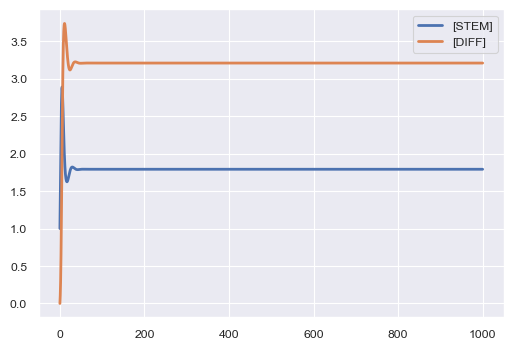

In [ ]:
model = twoCompartmentModel(
  STEM='1', DIFF='0', 
  L='0.5',P='.5',D='0.1',
  Control=[inhib['komorova']('DIFF','5'),excite['komorova']('STEM','5')],
  Events=[''])

r = te.loada(model)
r.simulate(0, 1000, 10000)
r.plot()

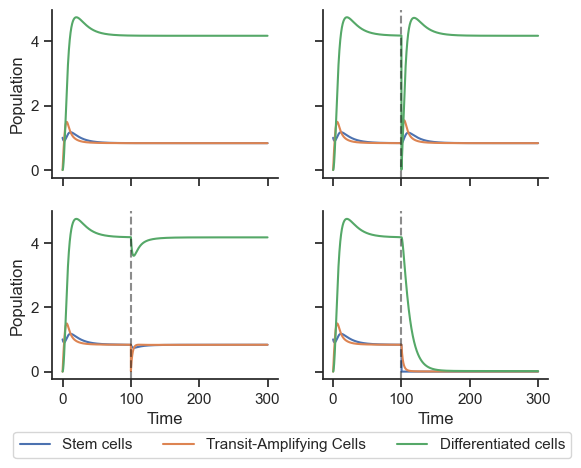

In [ ]:
InhibInhibInhib00 = threeCompartmentModel(
  STEM='1', INTER='0', DIFF='0', 
  L_S='0.5',P_S='0.5',L_I='0.5',P_I='0.5',D='0.1',
  Control=[inhib['komorova']('STEM','5'), inhib['komorova']('INTER','5'), inhib['komorova']('DIFF','5'), '1','1'],
  Events=[])

InhibInhibInhib00PerturbINTER = threeCompartmentModel(
  STEM='1', INTER='0', DIFF='0', 
  L_S='0.5',P_S='0.5',L_I='0.5',P_I='0.5',D='0.1',
  Control=[inhib['komorova']('STEM','5'), inhib['komorova']('INTER','5'), inhib['komorova']('DIFF','5'), '1','1'],
  Events=['at time> 100: DIFF= 0;'])

InhibInhibInhib00Closer = threeCompartmentModel(
  STEM='1', INTER='0', DIFF='0', 
  L_S='0.5',P_S='0.5',L_I='0.5',P_I='0.5',D='0.1',
  Control=[inhib['komorova']('STEM','5'), inhib['komorova']('INTER','5'), inhib['komorova']('DIFF','5'), '1','1'],
  Events=['at time> 100: INTER= 0;'])

InhibInhibInhib00FAIL = threeCompartmentModel(
  STEM='1', INTER='0', DIFF='0', 
  L_S='0.5',P_S='0.5',L_I='0.5',P_I='0.5',D='0.1',
  Control=[inhib['komorova']('STEM','5'), inhib['komorova']('INTER','5'), inhib['komorova']('DIFF','5'), '1','1'],
  Events=['at time> 100: STEM= 0;'])

r = te.loada(InhibInhibInhib00)
s1 = r.simulate(0, 300, 10000,['STEM', 'INTER','DIFF'])
r = te.loada(InhibInhibInhib00PerturbINTER)
s2 = r.simulate(0, 300, 10000,['STEM', 'INTER','DIFF'])
r = te.loada(InhibInhibInhib00Closer)
s3 = r.simulate(0, 300, 10000,['STEM', 'INTER','DIFF'])
r = te.loada(InhibInhibInhib00FAIL)
s4 = r.simulate(0, 300, 10000,['STEM', 'INTER','DIFF'])


time = np.arange(0, 300, 0.03)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True)

ax1.plot(time, s1)
#ax1.set_title('Perturbing Differentiated Cells')
ax1.set_xlabel('Time')
ax1.set_ylabel('Population')
ax2.plot(time, s2)
#ax2.set_title('Perturbing Intermediate Cells')
ax2.set_xlabel('Time')
ax3.plot(time, s3)
#ax3.set_title('Perturbing Stem Cells Close to Zero')
ax3.set_xlabel('Time')
ax3.set_ylabel("Population")
ax4.plot(time, s4)
#ax4.set_title('Perturbing Stem Cells to Zero')
ax4.set_xlabel('Time')


#ax1.axvline(x=100, color='k',alpha= 0.5, linestyle='--')
ax2.axvline(x=100, color='k',alpha= 0.5, linestyle='--')
ax3.axvline(x=100, color='k',alpha= 0.5, linestyle='--')
ax4.axvline(x=100, color='k',alpha= 0.5, linestyle='--')

fig.legend(['Stem cells', 'Transit-Amplifying Cells','Differentiated cells'],loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.07), bbox_transform=plt.gcf().transFigure)
for ax in fig.get_axes():
    ax.label_outer()
    plt.savefig("timeseries3stage", dpi=1000, bbox_inches='tight')
plt.show()



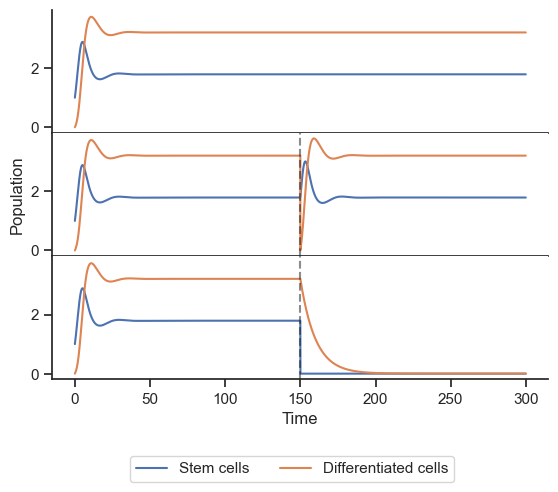

In [ ]:
InhibExcite = twoCompartmentModel(
  STEM='1', DIFF='0', 
  L='0.5',P='0.5',D='0.1',
  Control=[inhib['komorova']('DIFF','5'), excite['komorova']('STEM','5'), '1'], 
  Events=[])

InhibExciteCloser = twoCompartmentModel(
  STEM='1', DIFF='0', 
  L='0.5',P='0.5',D='0.1',
  Control=[inhib['komorova']('DIFF','5'), excite['komorova']('STEM','5'), '1'], 
  Events=['at time> 150: DIFF = 0;'])

InhibExciteFail = twoCompartmentModel(
  STEM='1', DIFF='0', 
  L='0.5',P='0.5',D='0.1',
  Control=[inhib['komorova']('DIFF','5'), excite['komorova']('STEM','5'), '1'], 
  Events=['at time> 150: STEM = 0;'])

r = te.loada(InhibExcite)
s1 = r.simulate(0, 300, 10000,['STEM', 'DIFF'])
r = te.loada(InhibExciteCloser)
s2 = r.simulate(0, 300, 10000,['STEM', 'DIFF'])
r = te.loada(InhibExciteFail)
s3 = r.simulate(0, 300, 10000,['STEM', 'DIFF'])
300
time = np.arange(0, 300, 0.03)
fig, (ax1, ax2, ax3) = plt.subplots(3,1, sharex=True, sharey=True)

# Remove vertical space between axes
fig.subplots_adjust(hspace=0)

ax1.plot(time, s1)
#ax1.set_title('Perturbing Differentiated Cells')
ax1.set_xlabel('Time')

ax2.plot(time, s2)
#ax2.set_title('Perturbing Stem Cells Close to Zero')
ax2.set_xlabel('Time')
ax2.set_ylabel("Population")
ax3.plot(time, s3)
#ax3.set_title('Perturbing Stem Cells to Zero')
ax3.set_xlabel('Time')
ax2.axvline(x=150, color='k',alpha= 0.5, linestyle='--')
ax3.axvline(x=150, color='k',alpha= 0.5, linestyle='--')

fig.legend(['Stem cells', 'Differentiated cells'], loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.12), bbox_transform=plt.gcf().transFigure)
#plt.savefig("timeseries2stage", dpi=1000, bbox_inches='tight')

#plt.show()
